In [1]:
import pandas as pd
import numpy as np

In [2]:
base_path = "../nanodiag_datasets/GSE175758/"

In [3]:
df_merged_signals = pd.read_csv(base_path + "merged_signals.csv", sep="\t")
df_merged_signals

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y.1,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
1,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
3,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
4,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
5,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
6,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
7,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
9,0.000000,0.662734,0.662734,0.000000,0.000000,0.000000,0.297521,0.000000,0.606316,0.606316,...,0.148856,0.105178,0.036514,0.145285,0.151303,0.054057,0.076587,0.067460,0.187142,1


In [ ]:
#df_merged_signals_features = df_merged_signals[df_merged_signals.columns[1:]]
#df_merged_signals_features

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [5]:
labels = df_merged_signals["treatment_label"]
features = df_merged_signals.drop(columns=["treatment_label"])

n_out_features = 500

reduced_features = SelectKBest(f_classif, k=n_out_features).fit_transform(features, labels)

In [6]:
reduced_features.shape

(50, 500)

/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-06 18:09:18.466020: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 18:09:18.546937: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 18:09:18.547007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 18:09:18.553755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register fa

<Axes: >

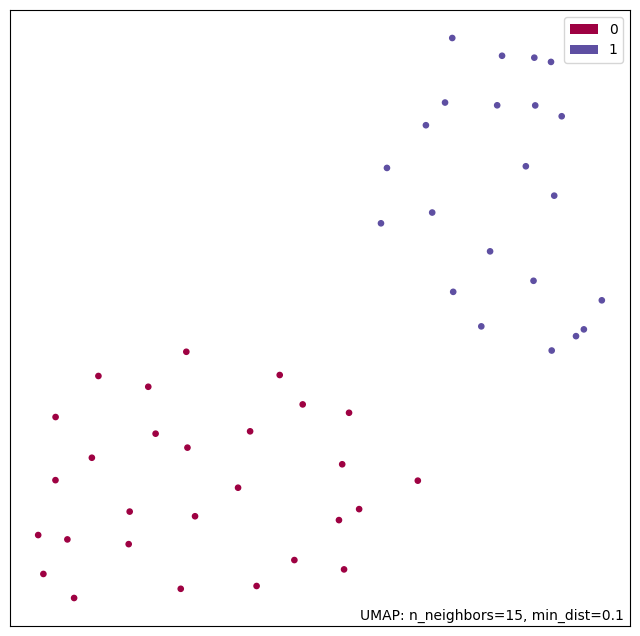

In [7]:
import umap
import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

mapper = umap.UMAP().fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=labels)

In [8]:
model_selectkfeatures = SelectKBest(f_classif, k=n_out_features).fit(features, labels)
#dir(model_selectkfeatures)

In [9]:
model_selectkfeatures.get_feature_names_out()

array(['cg02772823_SLC6A14', 'cg03212133_MMGT1', 'cg04730443_MAGEB6',
       'cg04886382_GAGE12G', 'cg04886382_GAGE6', 'cg04886382_GAGE12C',
       'cg04886382_GAGE12D', 'cg04886382_GAGE12E', 'cg08791322_DGAT2L6',
       'cg10127415_MAGEB6', 'cg13281118_GAGE2C', 'cg13281118_GAGE2A',
       'cg13281118_GAGE2D', 'cg13281118_GAGE2C.1', 'cg13281118_GAGE2E',
       'cg13281118_GAGE8', 'cg13281118_GAGE2A.1', 'cg13281118_GAGE8.1',
       'cg21039523_BEX4', 'cg26965953_IRS4', 'cg00086243_TNFRSF18',
       'cg00451039_LEPRE1', 'cg00451039_C1orf50', 'cg00746981_HDGF',
       'cg00746981_HDGF.1', 'cg00859330_AJAP1', 'cg02930200_DNALI1',
       'cg03136646_MMP23A', 'cg03136646_MMP23B', 'cg03337482_PRDM16',
       'cg03970567_ATF3', 'cg04364463_GRIK3', 'cg05068146_ESPN',
       'cg05095110_HES4', 'cg05793299_EPHA2', 'cg07015749_KCNAB2',
       'cg07230107_CNIH3', 'cg07230107_CNIH3.1', 'cg07817883_TMEM39B',
       'cg07817883_TMEM39B.1', 'cg08122545_HES4', 'cg08269653_FAM5B',
       'cg08700651_IL28

In [10]:
model_selectkfeatures.feature_names_in_, len(model_selectkfeatures.feature_names_in_)

(array(['cg00035864_TTTY18', 'cg00050873_TSPY4', 'cg00050873_FAM197Y2',
        ..., 'ch.22.757911F_XRCC6', 'ch.22.772318F_NAGA',
        'ch.22.909671F_ATXN10'], dtype=object),
 461274)

In [22]:
from sklearn.model_selection import train_test_split

n_out_features = 500
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25, 461274), (25, 461274), (25,), (25,))

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)


from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print(features.shape)
lsvc = LinearSVC(C=1.0, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc, prefit=True)
reduced_features = model.fit_transform(features)
reduced_features.shape

Classification accuracy without selecting features: 0.800
(50, 461274)


/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(50, 31)

In [23]:
#mapper = umap.UMAP(n_neighbors=15).fit(reduced_features) #n_neighbors=7
#umap.plot.points(mapper, labels=y_test)

In [24]:
model_selectkfeatures_train = SelectKBest(f_classif, k=n_out_features).fit(X_train, y_train)
model_selectkfeatures_train.get_feature_names_out()

array(['cg03212133_MMGT1', 'cg25525572_ESX1', 'cg26965953_IRS4',
       'cg00086243_TNFRSF18', 'cg00746981_HDGF', 'cg00746981_HDGF.1',
       'cg00786406_HIPK1', 'cg00903998_ESRRG', 'cg00903998_ESRRG.1',
       'cg00916635_PTPN22', 'cg00916635_PTPN22.1', 'cg01468656_HTR6',
       'cg01485998_VASH2', 'cg01485998_VASH2.1', 'cg02930200_DNALI1',
       'cg03136646_MMP23A', 'cg03136646_MMP23B', 'cg04010586_FAM176B',
       'cg04246763_LOC339524', 'cg05068146_ESPN', 'cg06161375_TRIM63',
       'cg07231649_VPS45', 'cg07231649_VPS45.1', 'cg07309943_ERO1LB',
       'cg07562458_WDR26', 'cg08269653_FAM5B', 'cg08700651_IL28RA',
       'cg11816923_PTPN14', 'cg12299829_NIPAL3', 'cg12299829_NIPAL3.1',
       'cg13976045_SLC30A1', 'cg14128890_FAM176B', 'cg14520600_MTR',
       'cg15827003_GNB1', 'cg15949277_ZC3H12A', 'cg16091981_PADI4',
       'cg16717690_UBE2J2', 'cg17278771_RFX5', 'cg17801256_ZMYM4',
       'cg20156382_LOC284632', 'cg21206397_CDC14A', 'cg21295838_PADI4',
       'cg21295838_PADI4.1',

In [25]:
test_transformed_features = model_selectkfeatures_train.transform(X_test)
test_transformed_features.shape

(25, 500)

In [26]:
scores = -np.log10(model_selectkfeatures_train.pvalues_)
scores /= scores.max()
scores, len(scores)

(array([0.10274515, 0.05610367, 0.05610367, ..., 0.1828561 , 0.04830012,
        0.17035089]),
 461274)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

Classification accuracy without selecting features: 0.800


In [28]:
clf_selected = make_pipeline(
    SelectKBest(f_classif, k=n_out_features), MinMaxScaler(), LinearSVC(dual="auto")
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

Classification accuracy after univariate feature selection: 0.880


In [29]:
y_pred = clf_selected.predict(X_test)
y_pred.shape

(25,)

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[13,  0],
       [ 3,  9]])

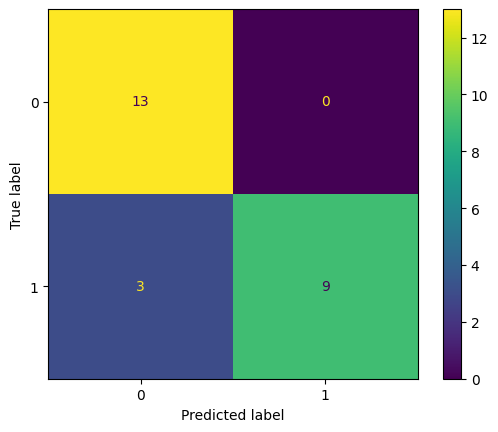

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_selected.classes_)
disp.plot()